<a href="https://colab.research.google.com/github/supertime1/PPG_DSP/blob/main/Time_Series_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', index_col='date', parse_dates=['date'])

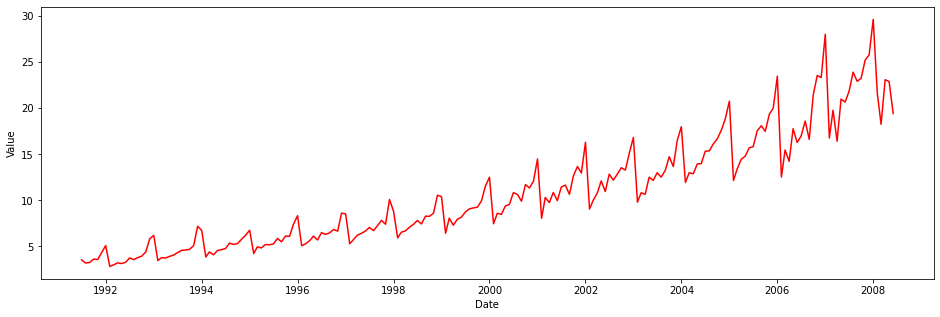

In [32]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df.value, 'r')

plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', index_col='date', parse_dates=['date'])
df.reset_index(inplace=True)

In [40]:
df['year'] = [d.year for d in df.date]

In [41]:
df['month'] = [d.month for d in df.date]

In [43]:
df['months'] = [d.strftime('%b') for d in df.date]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


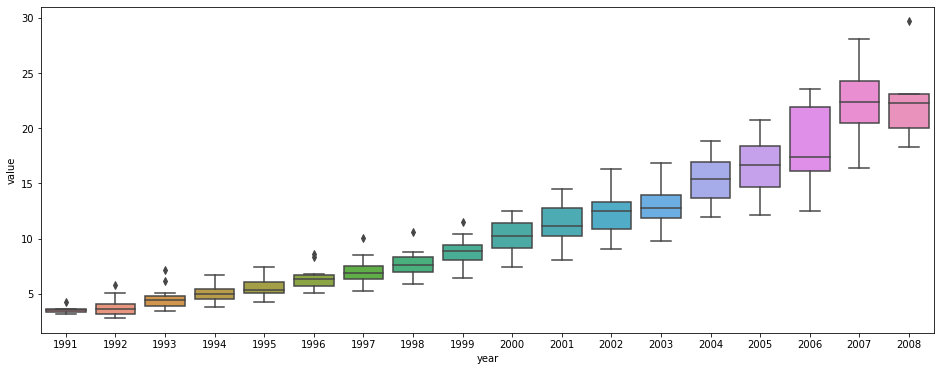

In [47]:
plt.figure(figsize=(16,6))
sns.boxplot('year','value',data=df)

Text(0.5, 0.98, 'Multiplicative Decompose')

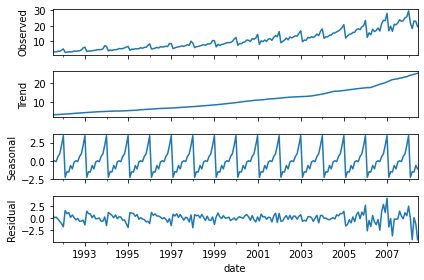

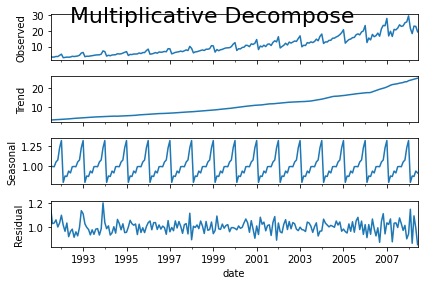

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

result_add.plot()
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)